<a href="https://colab.research.google.com/github/Nightmare125/Machine-Learning/blob/main/Bayes_Theorem_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

### Load dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving global_cancer_patients_2015_2024.csv to global_cancer_patients_2015_2024.csv


In [3]:
df = pd.read_csv("global_cancer_patients_2015_2024.csv")

### Exploration of data

In [4]:
print(df.shape)
print(df.head())

(50000, 15)
  Patient_ID  Age  Gender Country_Region  Year  Genetic_Risk  Air_Pollution  \
0  PT0000000   71    Male             UK  2021           6.4            2.8   
1  PT0000001   34    Male          China  2021           1.3            4.5   
2  PT0000002   80    Male       Pakistan  2023           7.4            7.9   
3  PT0000003   40    Male             UK  2015           1.7            2.9   
4  PT0000004   43  Female         Brazil  2017           5.1            2.8   

   Alcohol_Use  Smoking  Obesity_Level Cancer_Type Cancer_Stage  \
0          9.5      0.9            8.7        Lung    Stage III   
1          3.7      3.9            6.3    Leukemia      Stage 0   
2          2.4      4.7            0.1      Breast     Stage II   
3          4.8      3.5            2.7       Colon      Stage I   
4          2.3      6.7            0.5        Skin    Stage III   

   Treatment_Cost_USD  Survival_Years  Target_Severity_Score  
0            62913.44             5.9          

# Preprocessing

### Drop irrelevant columns

In [5]:
df_clean = df.drop(columns=['Patient_ID', 'Treatment_Cost_USD'])

###Drop rows with missing values

In [6]:
df_clean = df_clean.dropna()

### Encode categorical variables

In [8]:
label_encoders = {}
categorical_cols = ['Gender', 'Country_Region', 'Cancer_Type', 'Cancer_Stage']

for col in categorical_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

###Define features and target

In [15]:
X = df_clean.drop(columns=['Cancer_Stage'])
y = df_clean['Cancer_Stage']

### Split into Train/Test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

### Gaussian Naive Bayes Algorithm

In [17]:
class GaussianNaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {}

        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = np.mean(X_c, axis=0)
            self.var[c] = np.var(X_c, axis=0) + 1e-9  # avoid divide-by-zero
            self.priors[c] = X_c.shape[0] / X.shape[0]

    def gaussian_prob(self, class_idx, x):
        mean = self.mean[class_idx]
        var = self.var[class_idx]
        numerator = np.exp(- ((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

    def predict(self, X):
        predictions = []
        for x in X:
            posteriors = []
            for c in self.classes:
                prior = np.log(self.priors[c])
                conditional = np.sum(np.log(self.gaussian_prob(c, x)))
                posterior = prior + conditional
                posteriors.append(posterior)
            predictions.append(self.classes[np.argmax(posteriors)])
        return np.array(predictions)

### Train and Predict

In [18]:
nb = GaussianNaiveBayes()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

### Evaluate

In [19]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.2003
Precision: 0.20172771384201704
Recall: 0.2003
F1 Score: 0.1985614490221099

Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.16      0.18      1957
           1       0.22      0.17      0.19      2108
           2       0.19      0.27      0.23      1998
           3       0.19      0.22      0.21      1986
           4       0.20      0.18      0.19      1951

    accuracy                           0.20     10000
   macro avg       0.20      0.20      0.20     10000
weighted avg       0.20      0.20      0.20     10000



### Confusion Matrix

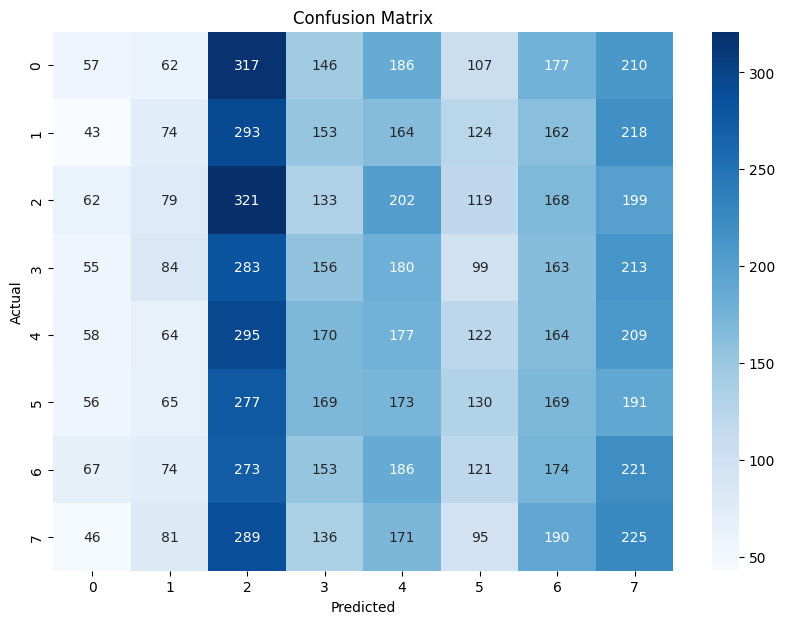

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


MATHEMATICAL FORMULAR
Bayes’ Theorem allows us to update the probability estimate for an event based on new evidence (Murphy, 2012). It is written as:                  
     P(A|B) = (P(B|A) * P(A))/(P(B))

Where:

•	P(A∣B): Posterior probability — the probability of event A given B is true.

•	P(B∣A): Likelihood — the probability of observing B given that A is true.

•	P(A): Prior probability of event A (before seeing B).

•	P(B): Marginal probability of event B (total probability of B across all outcomes).

INTUITION BEHIND CONDITIONAL PROBABILITY

Think of conditional probability as updating your belief after observing evidence.

Example: You want to know the probability that it rained today (A), given that the grass is wet (B).

•	Prior: You think rain is rare in your area, P(A) = 0.1

•	But: If it did rain, the grass is likely to be wet, P(B∣A) = 0.9

•	Also: Sometimes sprinklers make the grass wet too, so P(B) is higher than just from rain.

Bayes’ Theorem gives you a revised estimate of how likely it rained, given the observed evidence (wet grass).

 REAL-WORLD EXAMPLES

Medical Diagnosis (Mitchell, 1997):

•	Let A = patient has cancer, B = test result is positive.

•	P(A): cancer prevalence, say 1%.

•	P(B∣A): probability test is positive if they have cancer (sensitivity).

•	P(B): total chance of a positive test result.

•	Bayes’ Theorem tells you P(A∣B): the chance a person has cancer given a positive result.

Spam Filtering (Jordan, 2002):

•	A = message is spam, B = it contains the word “free”.

•	Use Bayes’ Theorem to compute P(spam∣“free”), helping decide if a message is spam.

BAYES’ THEOREM IN NAIVE BAYES ALGORITHM

In classification problems, we want:

     P(class∣features) ∝ P(class) ∏P(xi∣class)

Bayes’ Theorem allows us to flip the direction:

•	Instead of directly computing P(class∣features)P(class∣features), we compute:

o	P(features∣class): Likelihood

o	P(class): Prior

•	Ignore P(features)P(features) during classification because it is constant across all classes.

The classifier predicts the class with the highest posterior probability (Zhang, 2004).

THE “NAIVE” ASSUMPTION

Naive Bayes makes a strong assumption (Domingos, 1997):

•	All features are conditionally independent given the class.

This means:

  P(x1,x2,...,xn∣class) = P(x1∣class) * P(x2∣class) * ... * P(xn∣class)

Why is it naive:

•	In real data, features are often correlated.

•	For example, in medical data: Age and Genetic_Risk might be related.

Why does it still work (Raschka, 2015):

•	Despite this unrealistic assumption, Naive Bayes often performs surprisingly well in practice, especially when:

o	Features are weakly correlated.

o	You need fast and interpretable models.

o	You have limited training data.

References

Domingos. (1997). On the optimality of the simple Bayesian classifier under zero-one loss.

Jordan, M. I. (2002). On Discriminative vs. Generative Classifiers: A comparison of logistic regression and naive Bayes.

Mitchell. (1997). Machine Learning. McGraw-Hill.

Murphy. (2012). Machine Learning: A Probabilistic Perspective. MIT Press.

Raschka. (2015). Python Machine Learning. Packt Publishing.

Zhang. (2004). The Optimality of Naive Bayes. AAAI Conference on Artificial Intelligence.


